In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # fc: full connetion
        self.fc1 = nn.Linear(1, 64) # bias is needed for complex net, bias=True is default
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [3]:
x_1 = np.linspace(-10, 10, 1000)
x_2 = x_1 ** 2
x_0 = x_1 ** 0

X = np.concatenate((x_2[None, :], # [] => [[]]
                    x_1[None, :],
                    x_0[None, :]), axis=0).T
y = np.dot(X, np.array([6, 3, 4]))

In [4]:
net = Net()
list(net.parameters())

[Parameter containing:
 tensor([[ 0.5113],
         [ 0.5662],
         [ 0.9357],
         [-0.6608],
         [-0.4088],
         [ 0.1582],
         [ 0.1149],
         [-0.5763],
         [-0.2341],
         [-0.7601],
         [-0.9818],
         [-0.1971],
         [ 0.2181],
         [-0.1716],
         [ 0.6594],
         [-0.4740],
         [ 0.7717],
         [-0.8246],
         [-0.5192],
         [ 0.9499],
         [-0.1634],
         [-0.2786],
         [-0.4598],
         [-0.1565],
         [ 0.9396],
         [-0.5233],
         [ 0.4405],
         [-0.7285],
         [ 0.4622],
         [ 0.8464],
         [-0.0576],
         [-0.3567],
         [-0.3613],
         [ 0.9551],
         [ 0.9131],
         [ 0.9828],
         [-0.3887],
         [-0.7227],
         [-0.7580],
         [-0.0362],
         [ 0.9720],
         [-0.3951],
         [-0.9431],
         [-0.3705],
         [ 0.1697],
         [-0.9573],
         [ 0.6615],
         [ 0.1957],
         [ 0.4114

In [5]:
X = torch.tensor(X[:, None, 1], dtype=torch.float32) # convert ndarray X to tensor
y = torch.tensor(y, dtype=torch.float32)

In [6]:
loss_function = nn.MSELoss()
optimizer = optim.RMSprop(net.parameters(), lr=1e-2)

tensor(74157.1875, grad_fn=<MseLossBackward>)
tensor(4108.6885, grad_fn=<MseLossBackward>)
tensor(2770.2805, grad_fn=<MseLossBackward>)
tensor(1700.1360, grad_fn=<MseLossBackward>)
tensor(916.1312, grad_fn=<MseLossBackward>)
tensor(458.1440, grad_fn=<MseLossBackward>)
tensor(230.9488, grad_fn=<MseLossBackward>)
tensor(114.0109, grad_fn=<MseLossBackward>)
tensor(68.2591, grad_fn=<MseLossBackward>)
tensor(41.5792, grad_fn=<MseLossBackward>)
tensor(27.6773, grad_fn=<MseLossBackward>)
tensor(22.3352, grad_fn=<MseLossBackward>)
tensor(18.1886, grad_fn=<MseLossBackward>)
tensor(15.3461, grad_fn=<MseLossBackward>)
tensor(13.9660, grad_fn=<MseLossBackward>)
tensor(13.0039, grad_fn=<MseLossBackward>)
tensor(12.1523, grad_fn=<MseLossBackward>)
tensor(11.7908, grad_fn=<MseLossBackward>)
tensor(11.4232, grad_fn=<MseLossBackward>)
tensor(11.1000, grad_fn=<MseLossBackward>)
tensor(10.9679, grad_fn=<MseLossBackward>)
tensor(10.7917, grad_fn=<MseLossBackward>)
tensor(10.7166, grad_fn=<MseLossBackward>

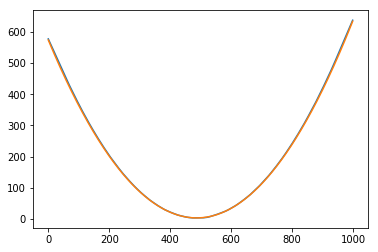

In [7]:
for t in range(4000):
    net.zero_grad()
    y_hat = net(X)
    loss = loss_function(y_hat.squeeze(1), y) # (input, target)
    loss.backward()
    optimizer.step()
    
    if t % 100 == 0:
        print(loss)
        plt.clf()
        y_hat_np = y_hat.detach().numpy() # detach减去y_hat的梯度
        plt.plot(y_hat_np)
        plt.plot(y.numpy())

In [ ]:
x_test_1 = np.linspace(-20, -10, 1000)
x_test_2 = x_test_1 ** 2
x_test_0 = x_test_1 ** 0

X_test = np.concatenate((x_test_2[None, :], # [] => [[]]
                    x_test_1[None, :],
                    x_test_0[None, :]), axis=0).T
y_test = np.dot(X_test, np.array([6, 3, 4]))

X_test = torch.tensor(X_test[:, None, 1], dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
                             
y_test_hat = net(X_test)